<a href="https://colab.research.google.com/github/Masoud0389/FDI-Attack-Detection/blob/main/FDI_Detection_nl_LR_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#!pwd

In [4]:
dataset = pd.read_csv('drive/MyDrive/Datasets/DS_FDI9_nl.csv')

In [5]:
X = dataset.iloc[:, :]

In [6]:
y = np.arange(0, 1200019)
y = y*0
for i in range(0, 20):
  y[4000+ 60001*i:7000+ 60001*i] = 1
y = pd.DataFrame(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [8]:
from sklearn.utils.sparsefuncs import min_max_axis
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
# Scaling the data to bring all the attributes to a comparable level
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)
#scaler = RobustScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)
#maxabs_scaler = MaxAbsScaler()
#X_train_scaled = maxabs_scaler.fit_transform(X_train)
#X_test_scaled = maxabs_scaler.fit_transform(X_test)
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train) 
X_test_scaled = min_max_scaler.fit_transform(X_test) 
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_train_normalized = normalize(X_train_scaled, norm = 'l1')
X_test_normalized = normalize(X_test_scaled, norm = 'l1')
# Converting the numpy array into a pandas DataFrame
X_train_normalized = pd.DataFrame(X_train_normalized)
X_test_normalized = pd.DataFrame(X_test_normalized)

# Feature Selection/Reduction

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, whiten= True)
X_train_principal = pca.fit_transform(X_train_normalized)
X_train_principal = pd.DataFrame(X_train_principal)
X_test_principal = pca.fit_transform(X_test_normalized)
X_test_principal = pd.DataFrame(X_test_principal)

# Plot Test

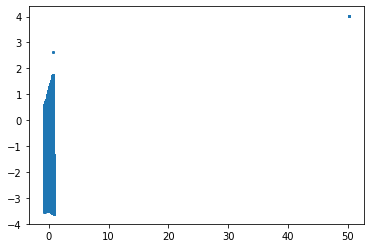

In [10]:
plt.scatter(X_train_principal.iloc[:,0], X_train_principal.iloc[:,1], s = 1 , alpha=1)

# Anomaly Detection

In [13]:
#from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
#classifier.fit(X_train_principal, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [18]:
#from sklearn.neighbors import KNeighborsClassifier
#classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#classifier.fit(X_train_principal, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_principal, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
#from sklearn.cluster import DBSCAN
#Numpy array of all the cluster labels assigned to each data point
#label = DBSCAN(eps = 0.001, min_samples = 10, algorithm='ball_tree', metric='haversine').fit_predict(X_principal)
#label = db_default.labels_
#labels.to_csv('test_DBSCAN1.csv')

In [ ]:
#from sklearn.ensemble import IsolationForest
#label = IsolationForest(n_estimators= 500, contamination=3/60).fit_predict(X_principal)

In [ ]:
#from sklearn.cluster import OPTICS
#label = OPTICS(min_samples= 500).fit_predict(X_principal)

In [ ]:
#from sklearn.neighbors import LocalOutlierFactor
#lof = LocalOutlierFactor(n_neighbors=500)
#label = lof.fit_predict(X_principal)

In [ ]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=2, algorithm='elkan', init='k-means++')
#label = kmeans.fit_predict(X_principal)

# Metrics

In [21]:
y_pred = classifier.predict(X_test_principal)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
classifier.score(X_test_principal, y_pred)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
[prec, rec, f1, n] = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Precision is: ', prec)
print('Accuracy is: ', acc)
print('Recall is: ', rec)
print('F1_Score is: ', f1)
print('True Negative is: ', TN, "\nFalse Negative is: ", FN, '\nTrue Positive is: ', TP, '\nFalse Positive is: ', FP)

Precision is:  0.9446077121738357
Accuracy is:  0.9921292978450359
Recall is:  0.89329627758127
F1_Score is:  0.9182357269618664
True Negative is:  227508 
False Negative is:  1267 
True Positive is:  10607 
False Positive is:  622


# Visualization

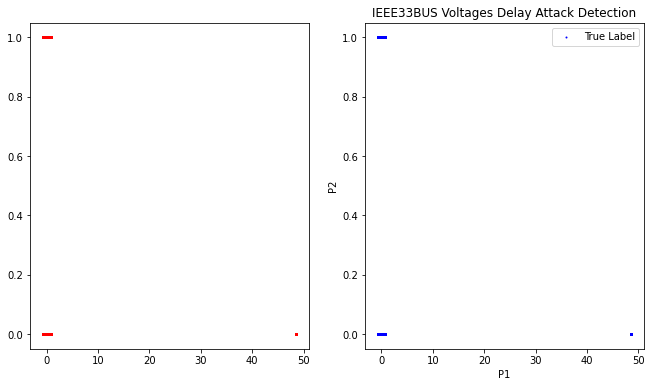

In [17]:
fig, ax = plt.subplots(ncols = 2) 
fig.set_figheight(6)
fig.set_figwidth(11)
ax[0].scatter(X_test_principal.iloc[:, 0], y_pred[:], s = 1, c = 'red', label = 'Predicted Label', alpha= 1)
ax[1].scatter(X_test_principal.iloc[:, 0], y_test.iloc[:, 0], s = 1, c = 'blue', label = 'True Label', alpha = 1)
#plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], c = 'b', s = 1 , alpha=1)
#plt.scatter(values.iloc[:, 0], values.iloc[:, 1], c = 'r', s = 1 , alpha=1)
plt.title('IEEE33BUS Voltages Delay Attack Detection')
plt.xlabel('P1')
plt.ylabel('P2')
plt.legend()
plt.show()